<a href="https://colab.research.google.com/github/Korbisch/Master-Thesis-Notebooks/blob/main/MA_Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Masterarbeit Neuronale Netze und Deep Learning**

**Thema:** Architekturen von neuronalen Netzen für die Klassifizierung von Kleidungsstücken: Konzeption und Implementierung einer vergleichenden Analyse

**Autor:** Korbinian Schleifer

In diesem Notebook wird beispielhaft eine Architektur eines neuronalen Netzes erstellt, um Kleidungsstücke zu klassifizieren.

<img src="https://cdn.pixabay.com/photo/2020/02/15/14/19/network-4851079_1280.jpg" width="800"/>

# Vorgehen & Inhaltsverzeichnis:

1. Import & Installation aller benötigten Libraries und Frameworks
2. Download der Daten
3. Datenvorverarbeitung
4. Laden der Daten als Numpy Array
5. Datensplit
6. Modell erstellen
7. Test des Modells

# 0. Setup

Um eine möglichst schnelle Laufzeit und geringe Wartezeiten zu garantieren sollte eine GPU für das Training verwendet werden.

In der Navigations-Leiste unter dem Punkt `Laufzeit => Laufzeittyp ändern => Hardwarebeschleuniger` kann eine GPU Instanz ausgewählt werden.

# 1. Import & Installation aller benötigten Libraries und Frameworks

Installationen werden für die Ausführung in Colab nicht benötigt, sondern nur bei lokaler Ausführung.

Installationen müssen nur einmal ausgeführt werden.
Imports können bei einem Verbindungsverlust erneut benötigt werden.

Für die Verwendung von command line Funktionen muss in Jupyter Notebooks ein `!` an den Anfang der Zeile gesetzt werden.

In [ ]:
# install libraries
#!pip install tensorflow
#!pip install matplotlib
#!pip install numpy
#!pip install pandas

Alle Benötigten Libraries und Frameworks für das Projekt werden heruntergeladen:
- Tensorflow: Standard Machine Learning Framework für die Berechnung von Tensoroperationen
- Keras: High Level Framework für das Bauen von neuronalen Netzen
- Matplotlib: Für das Plotten von Graphen und Anzeigen von Bildern
- Numpy: Einfache Bearbeitung von mehrdimensionalen Arrays
- Pandas: Für die Datenvorverarbeitung z.B. Einlesen von CSV-Dateien
- OS: Standard Betriebssystem Funktionen

In [1]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, Input
from keras.preprocessing.image import load_img
from keras.models import Model


#from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np
import pandas as pd
# system libraries
import datetime, os, time, random, platform
# for google colab only
#from google.colab import drive
from google.colab import files

# print version numbers
print('Tensorflow version: {}'.format(tf.__version__))
print('Python version: {}'.format(platform.python_version()))
print('Keras version: {}'.format(keras.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))

Tensorflow version: 2.4.0
Python version: 3.6.9
Keras version: 2.4.0
Numpy version: 1.19.4
Pandas version: 1.1.5
Matplotlib version: 3.2.2


# 2. Download der Daten







Die Daten werden auf der Webseite Kaggle zur Verfügung gestellt. Um die Daten herunterzuladen muss ein Account erstellt werden und man muss sich mit der Kaggle API verbinden.

Der Original Datensatz stammt von Param Aggarwal und kann unter folgendem Link abgerufen werden: https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset. Die Bild Daten haben allerdings eine größe von mehr als 15 GB, was zu langen Wartezeiten bei der Ausführung führt. Zudem sind die Bilder sehr groß (1080x1440 und 1800x2400 Pixel), was für das Deep Learning wenig praktikabel ist.

Deshalb wurden alle Bilder aus diesem Datensatz auf 250x250 Pixel verkleinert. Der angepasste Datensatz ist unter folgendem Link verfügbar: https://www.kaggle.com/dataset/009b0b26d6b841054c137dc96f021703d7d74669d9f2fcb3acb9fb0c3ecb78a8

### 2.1 Account bei Kaggle erstellen
Besuche die Webseite Kaggle: https://www.kaggle.com und erstelle einen Account.

### 2.2 Download des Kaggle API Tokens
Unter `Profil => Account => API => Create New API Token` kann eine Json-Datei mit dem persönlichen Kaggle API Token heruntergeladen werden.

### 2.3 Upload der Json Datei
Zelle ausführen und über den Button `Dateien auswählen` die Json-Datei hochladen.

In [ ]:
# Upload der kaggel.json Datei
files.upload()

### 2.4 Setup der Kaggle API

In [3]:
# Kaggle installieren
!pip install -q kaggle
# Erstellen eines Kaggle Verzeichnisses
!mkdir -p ~/.kaggle
# Datei in dieses Verzeichnis kopieren
!cp kaggle.json ~/.kaggle/
# Überprüfen, ob Datei in diesem Verzeichnis ist
!ls ~/.kaggle
# Berechtigung ändern
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


### 2.5 Download der Daten
Der Datensatz wird mit dem Befehl `!kaggle datasets download` in das aktuelle Verzeichnis heruntergeladen, was in diesem Fall `/content` ist. Der Fortschritt des Downloads sollte in der Ausgabe erscheinen.

In [4]:
# download the dataset
!kaggle datasets download -d korbinianschleifer/fashiondatasetnew

 99% 532M/537M [00:07<00:00, 75.0MB/s]
100% 537M/537M [00:07<00:00, 74.2MB/s]


Nach erfolgreichem Download sollte die Datei `fashiondatasetnew.zip` verfügbar sein.

In [5]:
# Inhalt des aktuellen Verzeichnisses ausgeben
!ls

fashiondatasetnew.zip  kaggle.json  sample_data


### 2.6 Entpacken der Daten
Da die Daten komprimiert sind, müssen sie noch entpackt werden.

In [ ]:
# unzip the data
!unzip fashiondatasetnew.zip

### 2.7 Festlegen des Daten-Pfads
Viele folgende Funktioen verwenden diese Konstante. Aus diesem Grund ist es entscheidend, hier den richtigen Pfad anzugeben. Im Normalfall ist dies: `/content/fashion-dataset-new` (An den Pfad sollte kein Slash angehängt werden).

Die Ausgabe sollte den Ordner `images` und die Datei `styles.csv` anzeigen.

In [7]:
# set the dataset path
DATASET_PATH = '/content/fashion-dataset-new'
# should print out the folder: images and the file: styles.csv
print(os.listdir(DATASET_PATH))

['images', 'styles.csv']


### 2.8 Bilder untersuchen

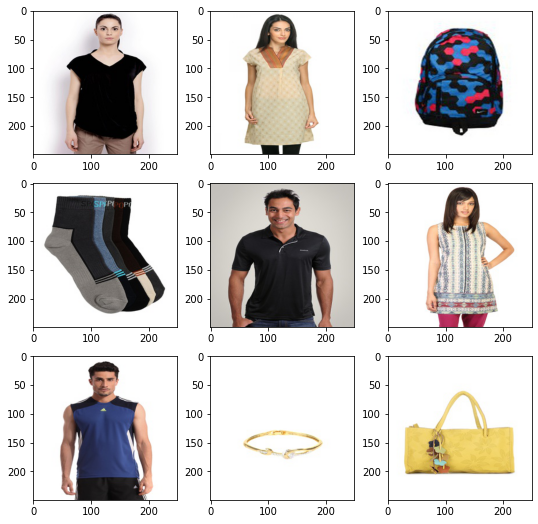

In [9]:
# plot some images to inspect data
image_path = DATASET_PATH + '/images/'
fig = plt.figure(figsize=(9, 9))
for i in range(9):
  img_file = random.choice(os.listdir(image_path))
  image = plt.imread(image_path + img_file)
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image)

plt.show()

# 3. Datenvorverarbeitung

### 3.1 Einlesen der CSV Datei

Hier wird die CSV-Datei eingelesen in der die Attribute zu jedem Bild spezifiziert sind.
Die Datei wird mithilfe von Pandas eingelesen und es wird ein Dataframe erstellt (df).
Einen Dataframe kann man sich wie eine Tabelle oder Excel-Liste vorstellen, in der Daten gespeichert werden.

Zudem werden alle Zeilen zufällig gemischt und die ersten 5 Zeilen des Dataframes ausgegeben, um den Erfolg des Vorgangs zu kontrollieren.

In [10]:
# read the csv file
df = pd.read_csv(DATASET_PATH + '/styles.csv', sep=';')
# randomly shuffle the dataset
df = df.sample(frac = 1)
# reset the index
df = df.reset_index(drop=True)
# show first five rows
df.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,7965,Men,Apparel,Topwear,Tshirts,Green,Fall,2011.0,Sports,Puma Men's Ess Polo Green T-shirt
1,20241,Women,Apparel,Topwear,Tshirts,Black,Fall,2011.0,Casual,Wrangler Women Printed Black T-shirt
2,7240,Men,Footwear,Shoes,Formal Shoes,Black,Fall,2011.0,Formal,Rockport Men's Stanton Black Shoe
3,28330,Men,Footwear,Sandal,Sandals,Black,Winter,2018.0,Casual,Red Tape Men Casual Black Sandals
4,41376,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Wrangler Women Kelly Blue Top


### 3.2 Auswahl der Klassen

Hier wird ein Ausschnitt des Dataframes ausgewählt. Die ausgewählte Kategorie (Spaltenname) soll später klassifiziert werden.

Dazu muss die Variable ```category``` auf den Spaltennamen geänder werden.

In [11]:
# specify columns you want to predict from the Data Frame here
columns = ['id', 'gender', 'subCategory', 'baseColour']

# create new subset data frame
sub_df = df[columns]
sub_df.head(5)

,id,gender,subCategory,baseColour
0,7965,Men,Topwear,Green
1,20241,Women,Topwear,Black
2,7240,Men,Shoes,Black
3,28330,Men,Sandal,Black
4,41376,Women,Topwear,Blue


### 3.3 Löschen von kleinen Klassen

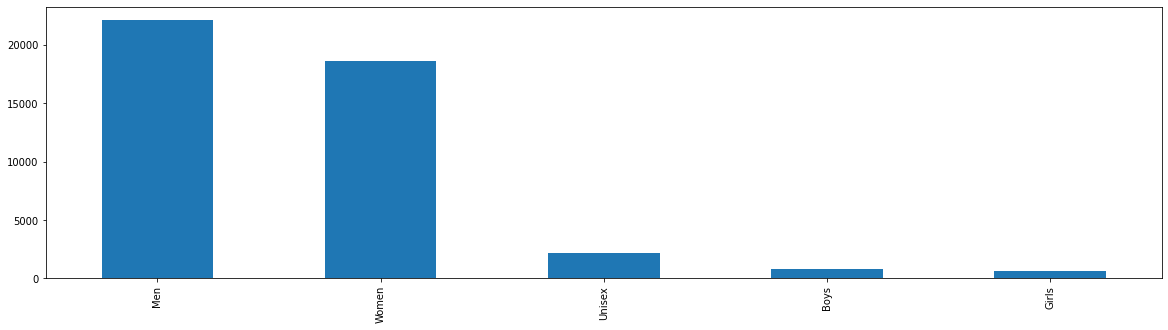

In [12]:
# Problem: uneven distributed value counts
value_counts = sub_df['gender'].value_counts()
# create the plot
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

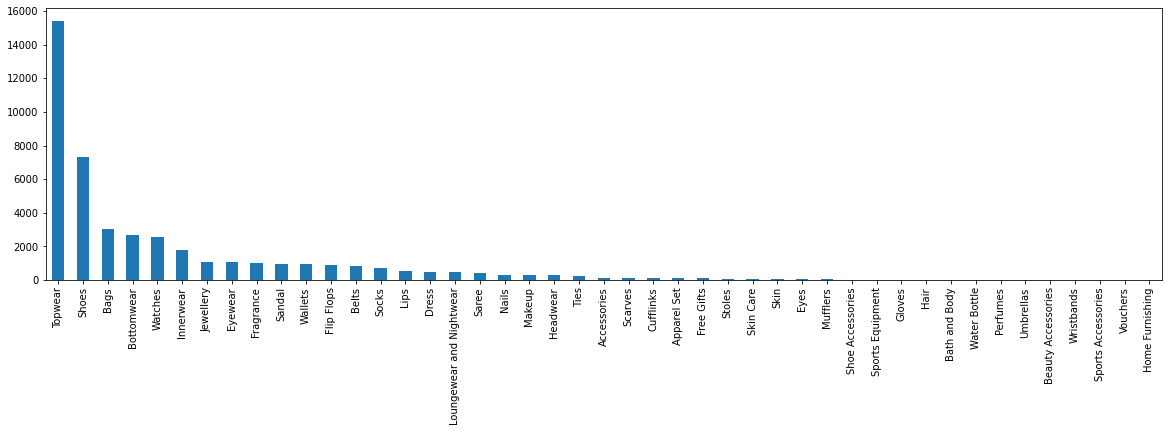

In [13]:
# Problem: uneven distributed value counts
value_counts = sub_df['subCategory'].value_counts()
# create the plot
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

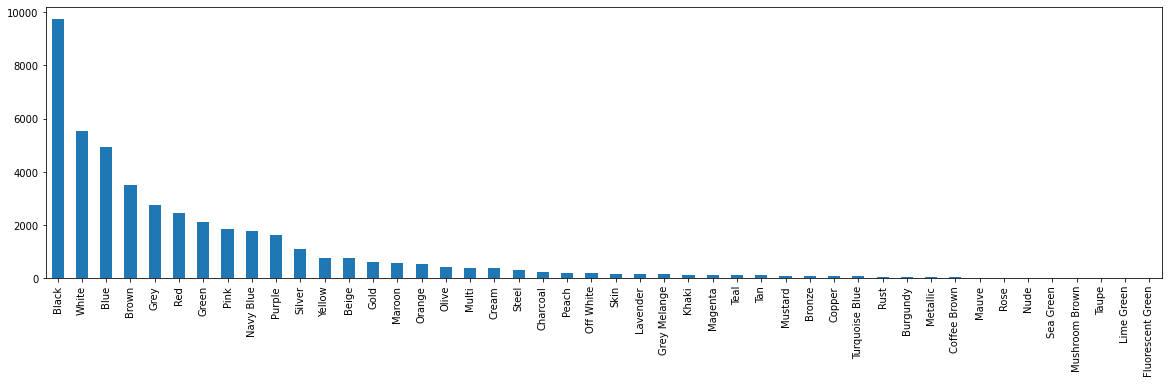

In [14]:
# Problem: uneven distributed value counts
value_counts = sub_df['baseColour'].value_counts()
# create the plot
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

In dem oberen Histogramm erkennt man, dass die Klassen sehr ungleichmäßig verteilt sind. Es gibt Klassen, für die nur sehr wenige Bilder verfügbar sind und Klassen, für die sehr viele Bilder verfügbar sind.

Merkmale aus Klassen mit nur wenigen Bildern können vom Modell nicht gut erlernt werden, da die Anzahl der Beispiele einfach zu gering ist.

Um dies zu vermeiden sollten alle Klassen in gleicher Anzahl vorliegen. Dazu werden Klassen mit nur wenigen Bildern komplett gelöscht (z.B. <= 100 oder <= 1000).

In [15]:
# remove labels below specified count
# all labels with a count that is lower or equal will be removed
rem_count_gender = 5000
rem_count_category = 1000
rem_count_color = 1000

# gender: get a list(series) of labels with lower count
count_series = sub_df['gender'].value_counts()
remove_gender = count_series[count_series <= rem_count_gender].index
# sub Category
count_series = sub_df['subCategory'].value_counts()
remove_category = count_series[count_series <= rem_count_category].index
# base Color
count_series = sub_df['baseColour'].value_counts()
remove_color = count_series[count_series <= rem_count_color].index

# prints labels that will be deleted
print(remove_gender)
print(remove_category)
print(remove_color)

Index(['Unisex', 'Boys', 'Girls'], dtype='object')
Index(['Sandal', 'Wallets', 'Flip Flops', 'Belts', 'Socks', 'Lips', 'Dress',
       'Loungewear and Nightwear', 'Saree', 'Nails', 'Makeup', 'Headwear',
       'Ties', 'Accessories', 'Scarves', 'Cufflinks', 'Apparel Set',
       'Free Gifts', 'Stoles', 'Skin Care', 'Skin', 'Eyes', 'Mufflers',
       'Shoe Accessories', 'Sports Equipment', 'Gloves', 'Hair',
       'Bath and Body', 'Water Bottle', 'Perfumes', 'Umbrellas',
       'Beauty Accessories', 'Wristbands', 'Sports Accessories', 'Vouchers',
       'Home Furnishing'],
      dtype='object')
Index(['Yellow', 'Beige', 'Gold', 'Maroon', 'Orange', 'Olive', 'Multi',
       'Cream', 'Steel', 'Charcoal', 'Peach', 'Off White', 'Skin', 'Lavender',
       'Grey Melange', 'Khaki', 'Magenta', 'Teal', 'Tan', 'Mustard', 'Bronze',
       'Copper', 'Turquoise Blue', 'Rust', 'Burgundy', 'Metallic',
       'Coffee Brown', 'Mauve', 'Rose', 'Nude', 'Sea Green', 'Mushroom Brown',
       'Taupe', 'Lime Gr

In [16]:
# removing category types from data frame
# ~: inverts a boolean value, isin: returns if value is in list
# remove gender
sub_df = sub_df[~sub_df['gender'].isin(remove_gender)]
# remove sub Category
sub_df = sub_df[~sub_df['subCategory'].isin(remove_category)]
# remove color
sub_df = sub_df[~sub_df['baseColour'].isin(remove_color)]

### 3.4 Gleichmäßige Verteilung der Klassen

Klassen mit vielen Bildern werden vom Modell zu stark erlernt, was dazu führt, dass das Modell einen Bias entwickelt. Aus diesem Grund müssen die Klassen gleichmäßig verteilt werden.

Aus allen Klassen mit zu vielen Bildern wird zufällig eine Anzahl ausgewählt, die der Anzahl der kleinsten Klasse entspricht.

In [21]:
# group labels by gender
#sub_df = sub_df.groupby('gender')
# get the minimum gender count
#min_count = sub_df.size().min()
# distribute labels evenly with minimum label count
#sub_df = sub_df.sample(min_count)

In [17]:
# group labels by sub category
sub_df = sub_df.groupby('subCategory')
# get the minimum sub category count
min_count = sub_df.size().min()
# distribute labels evenly with minimum label count
sub_df = sub_df.sample(min_count)

In [18]:
# group labels by color
sub_df = sub_df.groupby('baseColour')
# get the minimum color count
min_count = sub_df.size().min()
# distribute labels evenly with minimum label count
sub_df = sub_df.sample(min_count)

In [19]:
# Undo the groupby by randomly shuffling data and resetting the index

# randomly shuffle the dataset
sub_df = sub_df.sample(frac = 1)
# reset the index
sub_df = sub_df.reset_index(drop=True)

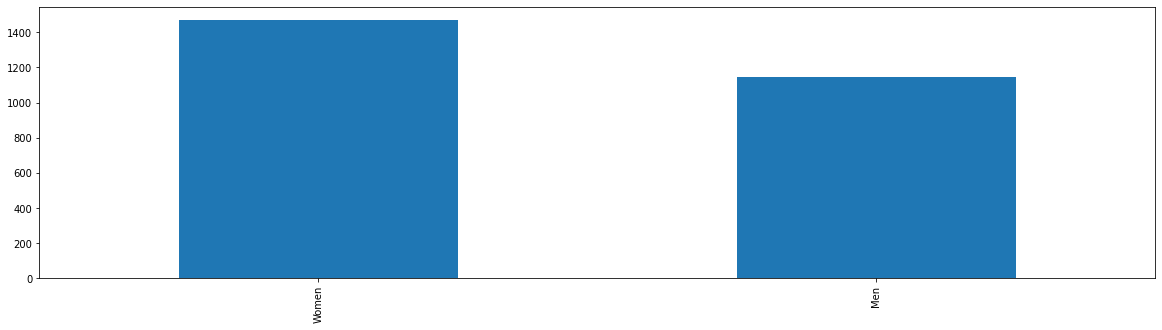

In [20]:
# plot again to check if balancing was successful
value_counts = sub_df['gender'].value_counts()
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

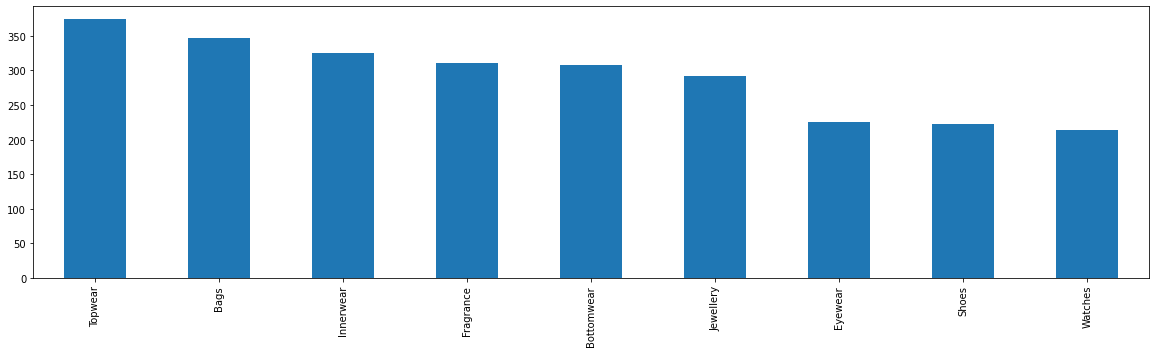

In [21]:
# plot again to check if balancing was successful
value_counts = sub_df['subCategory'].value_counts()
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

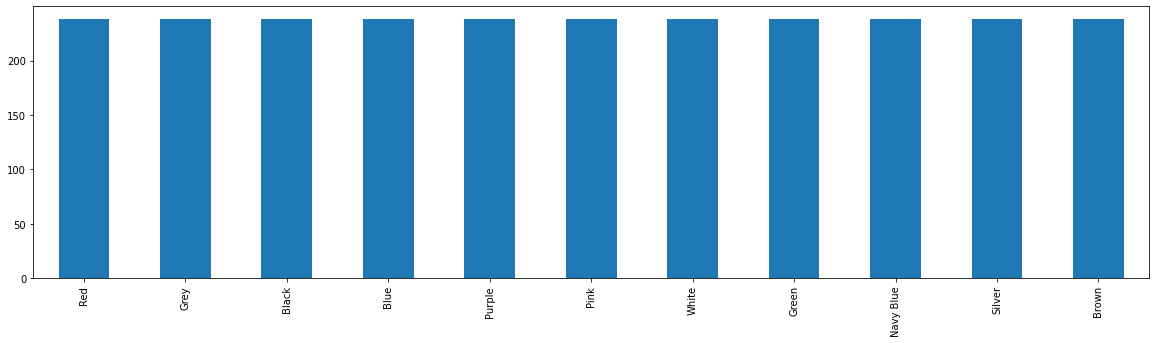

In [22]:
# plot again to check if balancing was successful
value_counts = sub_df['baseColour'].value_counts()
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

Leider kann aufgrund der Abhängigkeiten in den Daten keine 100% korrekte Datenverteilung erfolgen.
Dies sollte hier aber zu keinen größeren Problemen führen.

### 3.5 Umwandlung in numerische Daten

Alle Klassen werden in numerischen Werten codiert.
Dies erfolgt für jede Kategorie.

In [23]:
# cast column category to 'category' data type
sub_df = sub_df.astype({'gender': 'category', 'subCategory': 'category', 'baseColour': 'category'})
# add new column with class numbers
sub_df['gender_number'] = sub_df['gender'].cat.codes
sub_df['category_number'] = sub_df['subCategory'].cat.codes
sub_df['color_number'] = sub_df['baseColour'].cat.codes

sub_df.head(5)

,id,gender,subCategory,baseColour,gender_number,category_number,color_number
0,51688,Men,Eyewear,Brown,0,2,2
1,59689,Women,Innerwear,Pink,1,4,6
2,18092,Men,Innerwear,Navy Blue,0,4,5
3,51547,Women,Watches,Purple,1,8,7
4,10390,Women,Watches,White,1,8,10


### 3.6 Speichern der Klassen als Liste

Die Label werden als Liste gespeichert, um später die Korrektheit der Klassifizierung zu kontrollieren.

In [24]:
# create a data frame sorted by class_number
sorted_gender = sub_df.sort_values('gender_number')
sorted_category = sub_df.sort_values('category_number')
sorted_color = sub_df.sort_values('color_number')

# list of labels
gender_labels = sorted_gender['gender'].unique().to_list()
category_labels = sorted_category['subCategory'].unique().to_list()
color_labels = sorted_color['baseColour'].unique().to_list()

print(gender_labels)
print(category_labels)
print(color_labels)

['Men', 'Women']
['Bags', 'Bottomwear', 'Eyewear', 'Fragrance', 'Innerwear', 'Jewellery', 'Shoes', 'Topwear', 'Watches']
['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Navy Blue', 'Pink', 'Purple', 'Red', 'Silver', 'White']


In [ ]:
# test: the index of the list should be equal to the class_number
#print(unique_types[1])

# 4. Laden der Daten als Numpy Arrays

### 4.1 Festlegen der Variablen

Alle wichtigen Variablen für das Deep Learning werden hier festgelegt.

*   ```color_mode``` Untersuchter Farbmodus, entweder in Farbe oder schwarz-weiß
*   ```channels``` Anzahl der Farbkanäle, bei Farbe: 3, bei schwarz-weiß: 1
*   ```img_height``` Höhe eines Bildes
*   ```img_width``` Breite eines Bildes

In [25]:
# specify the color mode for the images
color_mode = 'rgb'
#color_mode = 'grayscale'

# specify the color channels: 3 for rgb, 1 for greyscale
channels = 3

# resizing of the images to
img_height = 150
img_width = 150

# set the number of class labels to predict for softmax classifier
gender_len = len(gender_labels)
category_len = len(category_labels)
color_len = len(color_labels)
print(gender_len, category_len, color_len)

# total number of images to load
total_imgs = len(sub_df)

2 9 11


### 4.2 Funktion zum Laden der Bilder

1.   Laden eines Bildes
2.   Umwandlung in Numpy Array
3.   Ändern in spezifizierte Größe
4.   Ändern des Datentyps (für Tensorflow)
5.   Normalisierung



In [26]:
# function to get the data from source
def fetch_images():

    # using a python list because numpy arrays are super slow when adding values
    image_data = []
    # get the list of images from data frame
    image_list = sub_df['id'].tolist()

    # for progress updates
    first = 0
    last = len(image_list)
    start_time = time.time()

    for image_id in image_list:
        image_path = DATASET_PATH + '/images/' + str(image_id) + '.jpg'

        try:
            # read image with keras function
            image = load_img(image_path, color_mode=color_mode, target_size=(img_height, img_width)) 
        except ImportError:
            #print("\n" + image_path + " could not be loaded")
            print('PIL is not available')
        except ValueError:
            print('interpolation method is not supported.')

        # make sure images have the right size and dimensions for keras
        # transform to numpy
        image = np.array(image, ndmin=4)
        image = np.reshape(image, [img_height, img_width, channels])
        image = np.float32(image)
        # normalise data
        image /= 255.0
        # add image to list
        image_data.append(image)
        
        # control progress
        end_time = time.time()
        first += 1
        print("\r[{}/{}]:{}% of images loaded, time: {}".format(first, last, int(first/last*100), end_time-start_time), end="")

    return image_data

Loading all the images from the directory. 

### 4.3 Bilder und Label laden

Bilder laden

In [27]:
# load the images
image_data = fetch_images()

[2618/2618]:100% of images loaded, time: 3.6915197372436523

In [28]:
# convert python list to numpy array
image_data = np.array(image_data)
image_data.shape

(2618, 150, 150, 3)

In [ ]:
# check image data
print(image_data[9000])

Label laden

In [29]:
# load the labels
gender_data = sub_df['gender_number'].tolist()
category_data = sub_df['category_number'].tolist()
color_data = sub_df['color_number'].tolist()

In [30]:
# create numpy array of labels
gender_data = np.array(gender_data, dtype='uint8')
category_data = np.array(category_data, dtype='uint8')
color_data = np.array(color_data, dtype='uint8')

# check for correct length: equal to number of instances from image_data
print(len(gender_data), len(category_data), len(color_data))

2618 2618 2618


In [31]:
# convert labels to binary class matrix (one hot encoding)
gender_data = tf.keras.utils.to_categorical(gender_data)
category_data = tf.keras.utils.to_categorical(category_data)
color_data = tf.keras.utils.to_categorical(color_data)
#print(label_data)

# 5. Datensplit

Split numpy Arrays in drei Teile:


1.   Trainingsdaten
2.   Validierungsdaten
3.   Testdaten

z.B. 80% / 10% / 10%



In [32]:
# get the indices where to do the split
split1 = int(0.8 * total_imgs)
split2 = int(0.9 * total_imgs)
print(split1, split2)

2094 2356


In [33]:
# train split
train_images = image_data[:split1]
# create a list of all the labels
train_labels = [gender_data[:split1], category_data[:split1], color_data[:split1]]

# validation split
val_images = image_data[split1:split2]
val_labels = [gender_data[split1:split2], category_data[split1:split2], color_data[split1:split2]]

# test split
test_images = image_data[split2:]
test_labels = [gender_data[split2:], category_data[split2:], color_data[split2:]]

print('number of training samples: {} equals {}%'.format(len(train_images), round(len(train_images)/total_imgs*100)))
print('number of validation samples: {} equals {}%'.format(len(val_images), round(len(val_images)/total_imgs*100)))
print('number of test samples: {} equals {}%'.format(len(test_images), round(len(test_images)/total_imgs*100)))

number of training samples: 2094 equals 80%
number of validation samples: 262 equals 10%
number of test samples: 262 equals 10%


# 6. Modell erstellen

Hier wird nicht mehr das Sequential Model von Keras sondern die funktionale API angewendet. Nur so kann ein Modell mit mehreren Ausgaben erstellt werden.

In [76]:
# create model with functional api

input_tensor = Input(shape=(img_height, img_width, channels))

x = layers.Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Dropout(0.7)(x)
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

gender_prediction = layers.Dense(gender_len, activation='softmax')(x)
category_prediction = layers.Dense(category_len, activation='softmax')(x)
color_prediction = layers.Dense(color_len, activation='softmax')(x)

model = Model(input_tensor, [gender_prediction, 
                             category_prediction, 
                             color_prediction])

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 148, 148, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 74, 74, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 72, 72, 64)   18496       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [77]:
# modell kompilieren
# loss: 2 classes: binary_crossentropy, 3+ classes: categorical_crossentropy
# optimizers: Adam, RMSprop, SGD (Stochastic Gradient Descent)
model.compile(optimizer = keras.optimizers.Adamax(),
               loss = ['binary_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],
               metrics = ['accuracy'])

# HINWEIS: loss muss eventuell als Liste angegeben werden, für jede Klassifizierung

In [78]:
# train the network
history = model.fit(train_images, 
            train_labels, 
            validation_data=(val_images, val_labels), 
            epochs=13,
            batch_size=1,
            shuffle=True)

Epoch 1/13
2094/2094 [==============================] - 12s 5ms/step - loss: 4.5620 - dense_1_loss: 0.6611 - dense_2_loss: 1.6377 - dense_3_loss: 2.2631 - dense_1_accuracy: 0.5742 - dense_2_accuracy: 0.4089 - dense_3_accuracy: 0.1799 - val_loss: 2.8819 - val_dense_1_loss: 0.5105 - val_dense_2_loss: 0.5241 - val_dense_3_loss: 1.8473 - val_dense_1_accuracy: 0.7557 - val_dense_2_accuracy: 0.8473 - val_dense_3_accuracy: 0.3702
Epoch 2/13
2094/2094 [==============================] - 11s 5ms/step - loss: 2.8396 - dense_1_loss: 0.4928 - dense_2_loss: 0.5632 - dense_3_loss: 1.7836 - dense_1_accuracy: 0.7718 - dense_2_accuracy: 0.8238 - dense_3_accuracy: 0.3706 - val_loss: 2.4481 - val_dense_1_loss: 0.4368 - val_dense_2_loss: 0.3917 - val_dense_3_loss: 1.6196 - val_dense_1_accuracy: 0.8015 - val_dense_2_accuracy: 0.8817 - val_dense_3_accuracy: 0.4237
Epoch 3/13
2094/2094 [==============================] - 11s 5ms/step - loss: 2.3363 - dense_1_loss: 0.4471 - dense_2_loss: 0.3827 - dense_3_loss: 

### Diagramme des Trainings

Genauigkeit Klassifizierung Training & Validierung

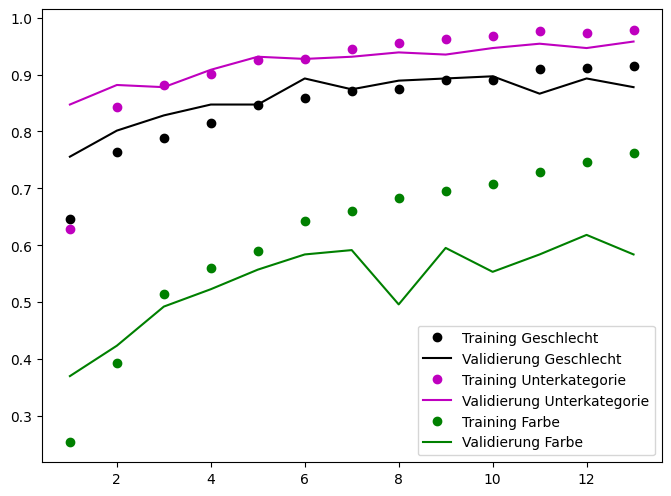

In [79]:
# plot the accuracy
gen_acc = history.history['dense_1_accuracy']
gen_val_acc = history.history['val_dense_1_accuracy']
cat_acc = history.history['dense_2_accuracy']
cat_val_acc = history.history['val_dense_2_accuracy']
col_acc = history.history['dense_3_accuracy']
col_val_acc = history.history['val_dense_3_accuracy']
epochs = range(1, len(gen_acc) + 1)
plt.figure(figsize=(8,6), dpi=100)
plt.plot(epochs, gen_acc, 'ko', label='Training Geschlecht')
plt.plot(epochs, gen_val_acc, 'k', label='Validierung Geschlecht')
plt.plot(epochs, cat_acc, 'mo', label='Training Unterkategorie')
plt.plot(epochs, cat_val_acc, 'm', label='Validierung Unterkategorie')
plt.plot(epochs, col_acc, 'go', label='Training Farbe')
plt.plot(epochs, col_val_acc, 'g', label='Validierung Farbe')
plt.legend()
plt.show()

Wert der Verlustfunktion Training & Validierung

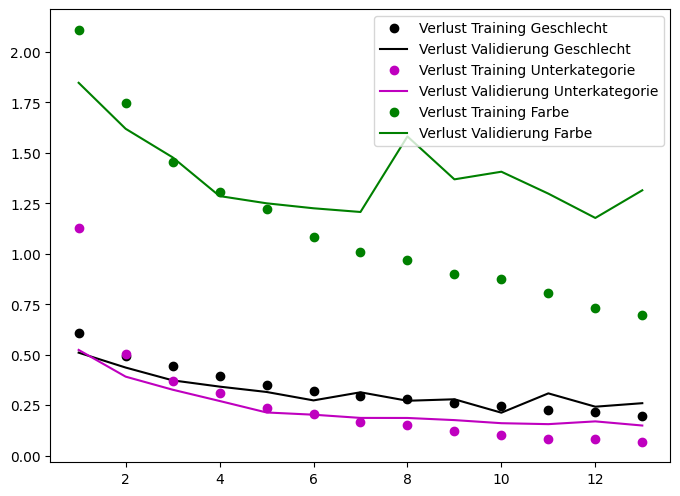

In [80]:
# plot the loss
gen_loss = history.history['dense_1_loss']
gen_val_loss = history.history['val_dense_1_loss']
cat_loss = history.history['dense_2_loss']
cat_val_loss = history.history['val_dense_2_loss']
col_loss = history.history['dense_3_loss']
col_val_loss = history.history['val_dense_3_loss']
epochs = range(1, len(gen_loss) + 1)
plt.figure(figsize=(8,6), dpi=100)
plt.plot(epochs, gen_loss, 'ko', label='Verlust Training Geschlecht')
plt.plot(epochs, gen_val_loss, 'k', label='Verlust Validierung Geschlecht')
plt.plot(epochs, cat_loss, 'mo', label='Verlust Training Unterkategorie')
plt.plot(epochs, cat_val_loss, 'm', label='Verlust Validierung Unterkategorie')
plt.plot(epochs, col_loss, 'go', label='Verlust Training Farbe')
plt.plot(epochs, col_val_loss, 'g', label='Verlust Validierung Farbe')
plt.legend()
plt.show()

In [75]:
# free up memory space and clear model session
import gc
gc.collect()
keras.backend.clear_session()

In [92]:
# speichern des modells
model.save('modell-multiklassifizierung.h5')

# 7. Test des Modells

auf unbekannten Daten

In [81]:
# specify test accuracy
loss, gen_loss, cat_loss, col_loss, gen_acc, cat_acc, col_acc = model.evaluate(test_images, test_labels, batch_size=1)
print('Gender test loss:', gen_loss, 'Gender test accuracy:', gen_acc)
print('Category test loss:', cat_loss, 'Gender test accuracy:', cat_acc)
print('Color test loss:', col_loss, 'Color test accuracy:', col_acc)

262/262 [==============================] - 1s 3ms/step - loss: 1.6847 - dense_1_loss: 0.3610 - dense_2_loss: 0.1534 - dense_3_loss: 1.1703 - dense_1_accuracy: 0.8473 - dense_2_accuracy: 0.9427 - dense_3_accuracy: 0.6221
Gender test loss: 0.36101365089416504 Gender test accuracy: 0.847328245639801
Category test loss: 0.1533643752336502 Gender test accuracy: 0.9427480697631836
Color test loss: 1.1703044176101685 Color test accuracy: 0.6221374273300171


### 7.1 Bilder testen und ausgeben

Als ersten werden aus den Test-Bildern 9 Stück zufällig ausgewählt.

Zuerst wird ein zufälliger Index aus den Bildern ausgewählt und eine Liste gespeichert.

In [87]:
# create random indices from test images
indices = []
for i in range(9):
  rand = random.randint(0, len(test_images))
  indices.append(rand)
print(indices)

[128, 173, 194, 48, 145, 123, 87, 135, 95]


Für alle Test-Bilder wird die Vorhersage der Klasse generiert und in der Variable predicitions gespeichert.

Die Vorhersage wird als Zahl ausgegeben. Diese wird in der Liste labels gespeidhert.

In [88]:
# testing
# compare predicted labels to true labels
prediction = model.predict(test_images)

# save predictions and true labels in a list
predicted_gen = []
true_gen = []
predicted_cat = []
true_cat = []
predicted_col = []
true_col = []


for num in indices:
  predicted_gen.append(np.argmax(prediction[0][num]))
  true_gen.append(np.argmax(test_labels[0][num]))
  predicted_cat.append(np.argmax(prediction[1][num]))
  true_cat.append(np.argmax(test_labels[1][num]))
  predicted_col.append(np.argmax(prediction[2][num]))
  true_col.append(np.argmax(test_labels[2][num]))

#print(predicted_gen)
#print(true_gen)

In [89]:
# print if prediction is correct
for i in range(len(predicted_gen)):
  print('img: {}, predictions: gender: {}, category: {}, color: {}'
  .format(sub_df.loc[split2 + indices[i], 'id'], 
          predicted_gen[i] == true_gen[i],
          predicted_cat[i] == true_cat[i],
          predicted_col[i] == true_col[i]
          ))

img: 53098, predictions: gender: True, category: True, color: False
img: 47993, predictions: gender: False, category: True, color: True
img: 59531, predictions: gender: True, category: True, color: True
img: 28047, predictions: gender: True, category: True, color: True
img: 20733, predictions: gender: True, category: True, color: False
img: 17335, predictions: gender: True, category: True, color: False
img: 26151, predictions: gender: True, category: True, color: False
img: 22337, predictions: gender: True, category: True, color: True
img: 27967, predictions: gender: False, category: False, color: True


Die Bilder werden geplottet.

Über den Index vom Data Frame wird das passende Bild gesucht, indem der zufällige Index zum Index des beginnenden Test-Splits hinzugefügt wird.

Der Titel wird über die Liste `unique_types` aus den gespeicherten Labels ausgewählt.

### 7.2 Plot der Klassifizierung

True: Klassifizierung ist richtig
False: Klassifizierung ist falsch

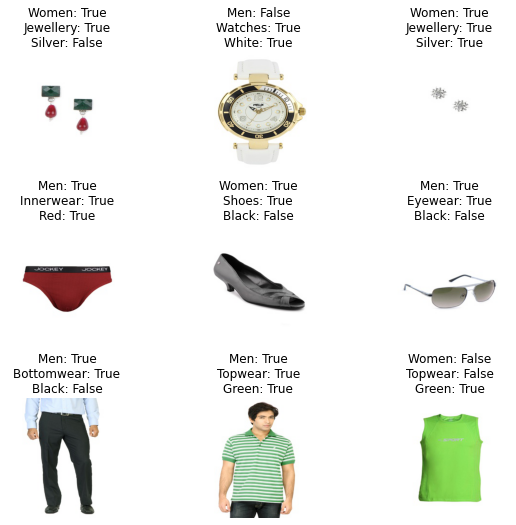

In [90]:
# index for data frame
image_path = DATASET_PATH + '/images/'
fig = plt.figure(figsize=(9, 9))


for i in range(9):
  # get the image path from the data frame
  image_id = sub_df.loc[split2 + indices[i], 'id']
  image = plt.imread(image_path + str(image_id) + '.jpg')
  fig.add_subplot(3,3,i+1)
  # get the predicted label
  plt.title(gender_labels[predicted_gen[i]] + ': ' + str(predicted_gen[i] == true_gen[i]) + '\n' +
            category_labels[predicted_cat[i]] + ': ' + str(predicted_cat[i] == true_cat[i]) + '\n' +
            color_labels[predicted_col[i]] + ': ' + str(predicted_col[i] == true_col[i])
            )
  plt.imshow(image)
  plt.axis('off')

plt.subplots_adjust(wspace=0.6)
